## Scikit-learn 기본 사용방법

In [49]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

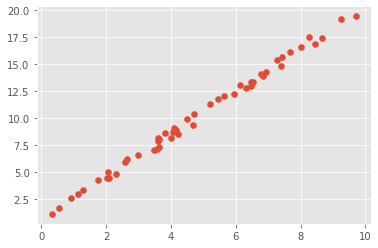

In [50]:
x = 10 * np.random.rand(50)
y = 2 * x + np.random.rand(50)

plt.scatter(x, y);

In [51]:
# 1. 적절한 estimator 클래스를 import해서 모델의 클래스 선택
from sklearn.linear_model import LinearRegression

In [52]:
# 2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
model = LinearRegression(fit_intercept=True)

model

LinearRegression()

In [53]:
# 3. 데이터를 특징 배열과 대상 벡터로 배치
X = x[:, np.newaxis]  #축 추가

x.shape, X.shape

((50,), (50, 1))

In [54]:
# 4. 모델 인스턴스의 fit() 메소드를 호출해 모델을 데이터에 fit
model.fit(X, y)

LinearRegression()

In [55]:
model.coef_, model.intercept_

(array([1.97260403]), 0.6846868328732132)

In [56]:
# 5. 모델을 새 데이터에 대해서 적용
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

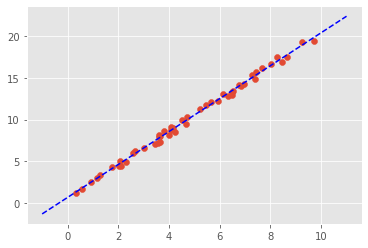

In [57]:
plt.scatter(x, y)
plt.plot(xfit, yfit, '--b');

## Diabetes 데이터셋 사용

In [58]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [59]:
print(f'Data : {diabetes.data.shape}')
diabetes.data

Data : (442, 10)


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [60]:
print(f'Target : {diabetes.target.shape}')
diabetes.target  #당뇨수치

Target : (442,)


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [61]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [62]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [63]:
pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

X_train.shape, X_test.shape

((353, 10), (89, 10))

In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
print(f'학습 데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test, y_test)}')

학습 데이터 점수 : 0.5026588761386088
평가 데이터 점수 : 0.5488492607285844


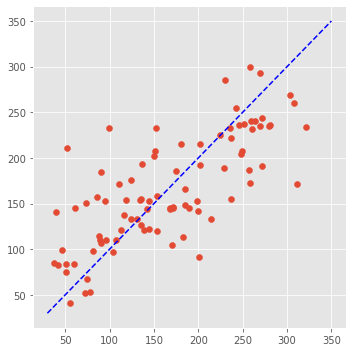

In [67]:
#모델의 예측값(y_pred)와 실제값(y_test) 비교
y_pred = model.predict(X_test)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.plot([30,350], [30,350], '--b')  #두 값이 같을 경우(x=y) 파란선에 빨간점이 위치하게됨
plt.tight_layout()

In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5)

print(f'5회 교차검증의 각 정확도 : {scores}')
print(f'교차검증의 정확도 : {round(np.mean(scores), 4)} +/- {round(np.std(scores), 4)}')

5회 교차검증의 각 정확도 : [0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
교차검증의 정확도 : 0.4823 +/- 0.0493


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=10)
result = gs.fit(diabetes.data, diabetes.target)

print(f'최적 점수 : {result.best_score_}')
print(f'최적 파라미터 : {result.best_params_}')
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

최적 점수 : 0.4633240541517593
최적 파라미터 : {'alpha': 0.1}
Ridge(alpha=0.1)


,params,mean_test_score,rank_test_score
0,{'alpha': 0.001},0.462293,3
1,{'alpha': 0.01},0.462910,2
2,{'alpha': 0.1},0.463324,1
3,{'alpha': 1},0.405417,4
4,{'alpha': 10},0.140733,5
5,{'alpha': 100},-0.013969,6
6,{'alpha': 1000},-0.037073,7


## Iris 데이터 사용

In [101]:
from sklearn.datasets import load_iris
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [109]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target, test_size=0.2, random_state=2)

model = LogisticRegression()
model.fit(X_train, y_train)

print(f'훈련 데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test, y_test)}')

훈련 데이터 점수 : 0.975
평가 데이터 점수 : 0.9333333333333333


In [104]:
import multiprocessing
from sklearn.linear_model import LogisticRegression

param_grid = [
    {'penalty':['l1', 'l2'],
     'C':[0.5, 1.0, 1.5, 1.8, 2.0, 2.4]}
]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())   #현재 내 컴퓨터에서 n_jobs=16

result = gs.fit(iris.data, iris.target)

print(f'최적 점수 : {result.best_score_}')
print(f'최적 파라미터 : {result.best_params_}')
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

최적 점수 : 0.9800000000000001
최적 파라미터 : {'C': 2.4, 'penalty': 'l2'}
LogisticRegression(C=2.4)


C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yeonok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

,params,mean_test_score,rank_test_score
0,"{'C': 0.5, 'penalty': 'l1'}",NaN,7
1,"{'C': 0.5, 'penalty': 'l2'}",0.966667,6
2,"{'C': 1.0, 'penalty': 'l1'}",NaN,8
3,"{'C': 1.0, 'penalty': 'l2'}",0.973333,2
4,"{'C': 1.5, 'penalty': 'l1'}",NaN,9
5,"{'C': 1.5, 'penalty': 'l2'}",0.973333,2
6,"{'C': 1.8, 'penalty': 'l1'}",NaN,10
7,"{'C': 1.8, 'penalty': 'l2'}",0.973333,2
8,"{'C': 2.0, 'penalty': 'l1'}",NaN,11
9,"{'C': 2.0, 'penalty': 'l2'}",0.973333,2


### 분류 데이터셋 만들어 accuracy_score, confusion_matrix, 
### precision/recall, f1_score, roc_auc_score 확인해보기

In [99]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'훈련 데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가 데이터 점수 : {model.score(X_test, y_test)}')
print(f'정확도 : {accuracy_score(y_test, y_pred)}')

훈련 데이터 점수 : 0.93625
평가 데이터 점수 : 0.92
정확도 : 0.92


In [77]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
con_mat

array([[100,   3],
       [  0,  97]], dtype=int64)

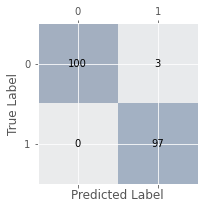

In [78]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(con_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        ax.text(x=j, y=i, s=con_mat[i,j], va='center', ha='center')
        
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout();

In [79]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'정밀도 : {precision}')  #FP(예측1, 실제0)이 중요할 때 ex)스팸메일
print(f'재현율 : {recall}')     #FN(예측0, 실제1)이 중요할 때 ex)암 검사

정밀도 : 0.97
재현율 : 1.0


In [80]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'f1_score : {f1}')  # 정밀도와 재현율 결합 : 2*(P*R)/(P+R) => 어느 한쪽으로 치우치지 않을 때 f1 score가 높아짐

f1_score : 0.9847715736040609


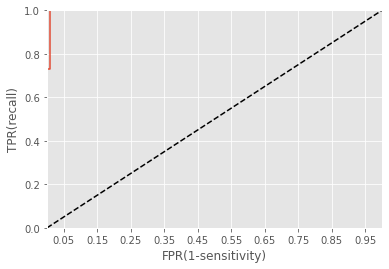

In [81]:
from sklearn.metrics import roc_curve  #FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선

pred_proba_class1 = model.predict_proba(X_test)[:,1]
fprs, tprs, threshold = roc_curve(y_test, pred_proba_class1)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1], [0,1], '--k', label='Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR(1-sensitivity)')
plt.ylabel('TPR(recall)');

In [82]:
from sklearn.metrics import roc_auc_score #ROC 곡선 아래 면적을 구한 값(1에 가까울수록 좋음)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'ROC_AUC score : {roc_auc}')

ROC_AUC score : 0.9854368932038835
